In [0]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
from google.colab import files
uploaded = files.upload()

Saving London Air Quality.csv to London Air Quality.csv


In [8]:
DATAPATH = "London Air Quality.csv"
data = pd.read_csv(DATAPATH, sep=',')
data.head()

,Month (text),GMT,London Mean Roadside Nitric Oxide (ug/m3),London Mean Roadside Nitrogen Dioxide (ug/m3),London Mean Roadside Oxides of Nitrogen (ug/m3),London Mean Roadside Ozone (ug/m3),London Mean Roadside PM10 Particulate (ug/m3),London Mean Roadside PM2.5 Particulate (ug/m3),London Mean Roadside Sulphur Dioxide (ug/m3),London Mean Background Nitric Oxide (ug/m3),London Mean Background Nitrogen Dioxide (ug/m3),London Mean Background Oxides of Nitrogen (ug/m3),London Mean Background Ozone (ug/m3),London Mean Background PM10 Particulate (ug/m3),London Mean Background PM2.5 Particulate (ug/m3),London Mean Background Sulphur Dioxide (ug/m3)
0,2008-01-01,00:00,NaN,42.258065,NaN,32.645161,22.967742,15.516129,3.354839,NaN,34.193548,NaN,41.774194,19.161290,NaN,3.129032
1,2008-01-01,01:00,NaN,33.774194,NaN,35.290323,21.161290,13.548387,2.612903,NaN,29.000000,NaN,45.290323,18.903226,NaN,3.064516
2,2008-01-01,02:00,NaN,28.838710,NaN,43.161290,19.580645,12.677419,2.129032,NaN,25.354839,NaN,46.645161,17.677419,NaN,3.290323
3,2008-01-01,03:00,NaN,27.322581,NaN,42.387097,18.322581,11.870968,1.967742,NaN,23.387097,NaN,46.645161,16.387097,NaN,3.322581
4,2008-01-01,04:00,NaN,29.387097,NaN,40.129032,18.096774,11.967742,2.193548,NaN,24.193548,NaN,45.225806,16.000000,NaN,2.774194


In [0]:
data.shape

(3168, 16)

In [0]:
data.dropna(axis=1, how='all', inplace=True)
data.dropna(axis=0, how='all', inplace=True)

In [0]:
data.head()

,Month (text),GMT,London Mean Roadside Nitric Oxide (ug/m3),London Mean Roadside Nitrogen Dioxide (ug/m3),London Mean Roadside Oxides of Nitrogen (ug/m3),London Mean Roadside Ozone (ug/m3),London Mean Roadside PM10 Particulate (ug/m3),London Mean Roadside PM2.5 Particulate (ug/m3),London Mean Roadside Sulphur Dioxide (ug/m3),London Mean Background Nitric Oxide (ug/m3),London Mean Background Nitrogen Dioxide (ug/m3),London Mean Background Oxides of Nitrogen (ug/m3),London Mean Background Ozone (ug/m3),London Mean Background PM10 Particulate (ug/m3),London Mean Background PM2.5 Particulate (ug/m3),London Mean Background Sulphur Dioxide (ug/m3)
0,2008-01-01,00:00,NaN,42.258065,NaN,32.645161,22.967742,15.516129,3.354839,NaN,34.193548,NaN,41.774194,19.161290,NaN,3.129032
1,2008-01-01,01:00,NaN,33.774194,NaN,35.290323,21.161290,13.548387,2.612903,NaN,29.000000,NaN,45.290323,18.903226,NaN,3.064516
2,2008-01-01,02:00,NaN,28.838710,NaN,43.161290,19.580645,12.677419,2.129032,NaN,25.354839,NaN,46.645161,17.677419,NaN,3.290323
3,2008-01-01,03:00,NaN,27.322581,NaN,42.387097,18.322581,11.870968,1.967742,NaN,23.387097,NaN,46.645161,16.387097,NaN,3.322581
4,2008-01-01,04:00,NaN,29.387097,NaN,40.129032,18.096774,11.967742,2.193548,NaN,24.193548,NaN,45.225806,16.000000,NaN,2.774194


In [0]:
def positive_average(num):
    return num[num > -200].mean()
    
daily_data = data.drop('GMT', axis=1).groupby('Month (text)').apply(positive_average)

In [0]:
daily_data.head()

,London Mean Roadside Nitric Oxide (ug/m3),London Mean Roadside Nitrogen Dioxide (ug/m3),London Mean Roadside Oxides of Nitrogen (ug/m3),London Mean Roadside Ozone (ug/m3),London Mean Roadside PM10 Particulate (ug/m3),London Mean Roadside PM2.5 Particulate (ug/m3),London Mean Roadside Sulphur Dioxide (ug/m3),London Mean Background Nitric Oxide (ug/m3),London Mean Background Nitrogen Dioxide (ug/m3),London Mean Background Oxides of Nitrogen (ug/m3),London Mean Background Ozone (ug/m3),London Mean Background PM10 Particulate (ug/m3),London Mean Background PM2.5 Particulate (ug/m3),London Mean Background Sulphur Dioxide (ug/m3)
Month (text),,,,,,,,,,,,,,
2008-01-01,NaN,55.502688,NaN,29.512097,24.969086,14.678763,4.217742,NaN,42.338710,NaN,36.942204,18.817204,NaN,3.572581
2008-02-01,NaN,75.922414,NaN,20.317529,39.477011,28.772989,7.553161,NaN,60.237069,NaN,26.425287,31.896552,NaN,6.734195
2008-03-01,NaN,55.610215,NaN,40.103495,21.569892,12.299776,3.868280,NaN,39.801075,NaN,50.227151,15.477151,NaN,2.286290
2008-04-01,NaN,61.756944,NaN,37.884722,28.740278,20.461111,4.475000,NaN,44.009722,NaN,50.133333,21.729167,NaN,3.236111
2008-05-01,NaN,62.903226,NaN,46.266129,34.611559,27.508065,4.634409,NaN,44.141129,NaN,60.512097,29.545699,16.621242,4.250000


In [0]:
daily_data.isna().sum() > 8

London Mean Roadside Nitric Oxide (ug/m3)             True
London Mean Roadside Nitrogen Dioxide (ug/m3)        False
London Mean Roadside Oxides of Nitrogen (ug/m3)       True
London Mean Roadside Ozone (ug/m3)                   False
London Mean Roadside PM10 Particulate (ug/m3)        False
London Mean Roadside PM2.5 Particulate (ug/m3)       False
London Mean Roadside Sulphur Dioxide (ug/m3)         False
London Mean Background Nitric Oxide (ug/m3)           True
London Mean Background Nitrogen Dioxide (ug/m3)      False
London Mean Background Oxides of Nitrogen (ug/m3)     True
London Mean Background Ozone (ug/m3)                 False
London Mean Background PM10 Particulate (ug/m3)      False
London Mean Background PM2.5 Particulate (ug/m3)     False
London Mean Background Sulphur Dioxide (ug/m3)       False
dtype: bool

In [0]:
daily_data = daily_data.iloc[:,(daily_data.isna().sum() <= 8).values]

In [0]:
daily_data.head()

,London Mean Roadside Nitrogen Dioxide (ug/m3),London Mean Roadside Ozone (ug/m3),London Mean Roadside PM10 Particulate (ug/m3),London Mean Roadside PM2.5 Particulate (ug/m3),London Mean Roadside Sulphur Dioxide (ug/m3),London Mean Background Nitrogen Dioxide (ug/m3),London Mean Background Ozone (ug/m3),London Mean Background PM10 Particulate (ug/m3),London Mean Background PM2.5 Particulate (ug/m3),London Mean Background Sulphur Dioxide (ug/m3)
Month (text),,,,,,,,,,
2008-01-01,55.502688,29.512097,24.969086,14.678763,4.217742,42.338710,36.942204,18.817204,NaN,3.572581
2008-02-01,75.922414,20.317529,39.477011,28.772989,7.553161,60.237069,26.425287,31.896552,NaN,6.734195
2008-03-01,55.610215,40.103495,21.569892,12.299776,3.868280,39.801075,50.227151,15.477151,NaN,2.286290
2008-04-01,61.756944,37.884722,28.740278,20.461111,4.475000,44.009722,50.133333,21.729167,NaN,3.236111
2008-05-01,62.903226,46.266129,34.611559,27.508065,4.634409,44.141129,60.512097,29.545699,16.621242,4.250000


In [0]:
daily_data.shape

(132, 10)

In [0]:
data['Month (text)'] = pd.to_datetime(data['Month (text)'], errors='coerce')

In [0]:
for col in data.iloc[:,2:].columns:
    if data[col].dtypes == object:
        data[col] = data[col].str.replace(',', '.').astype('float')

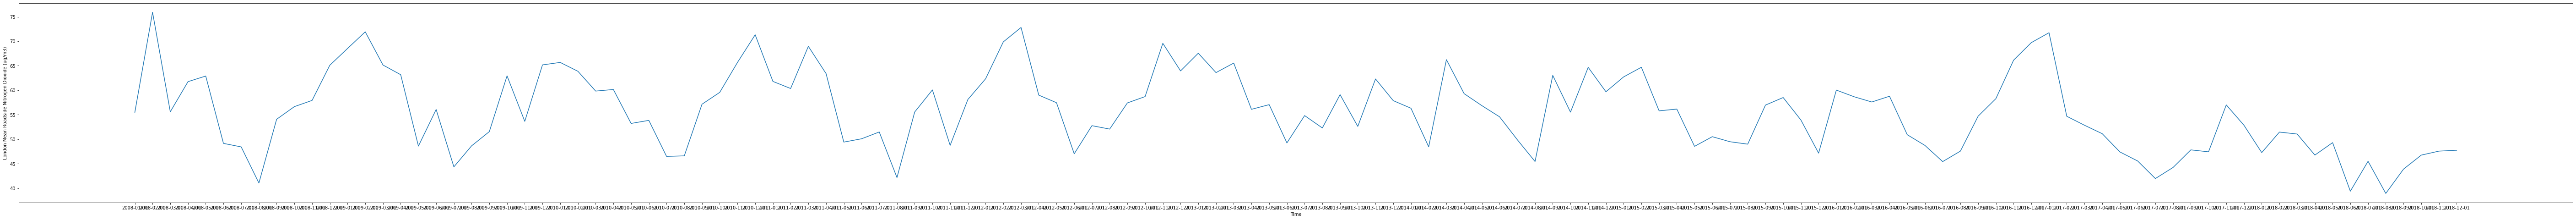

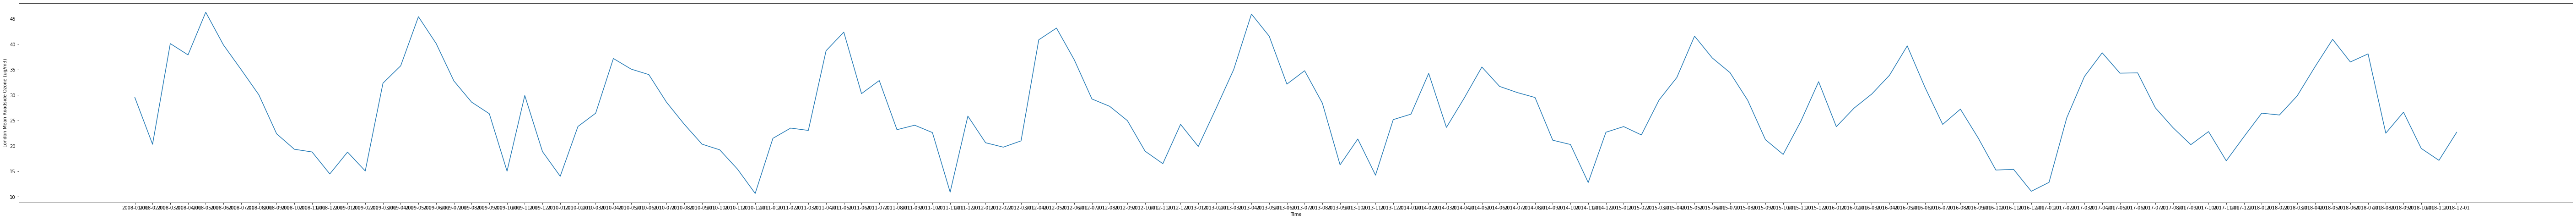

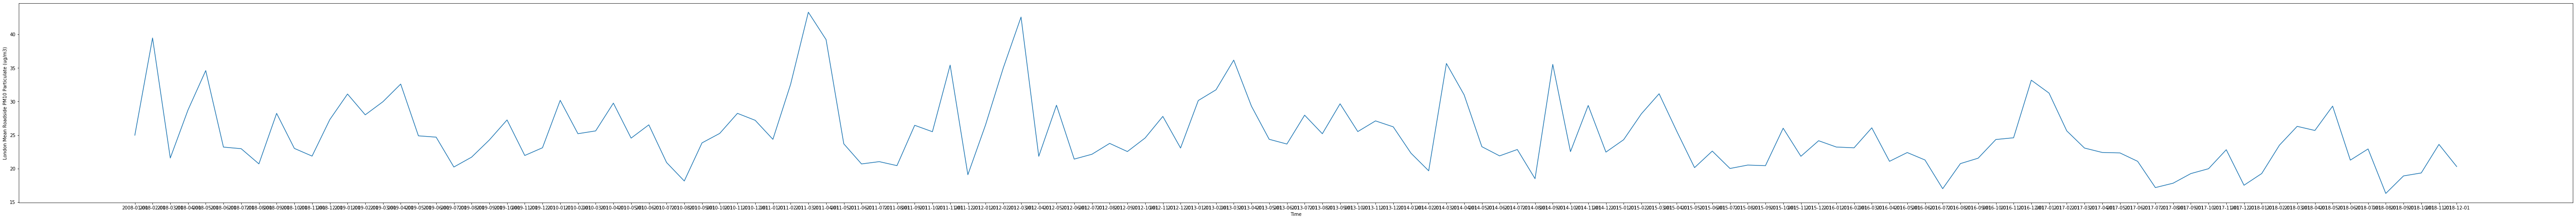

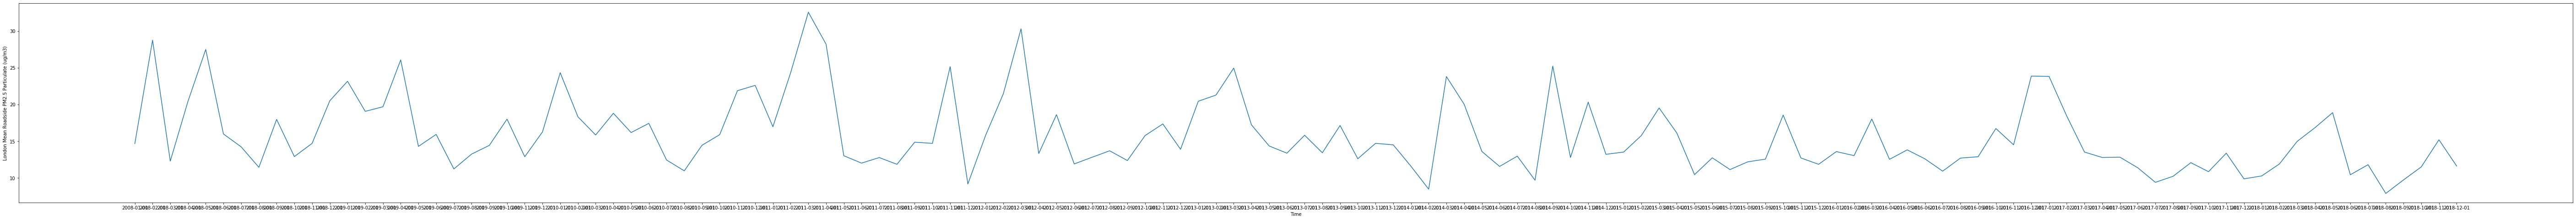

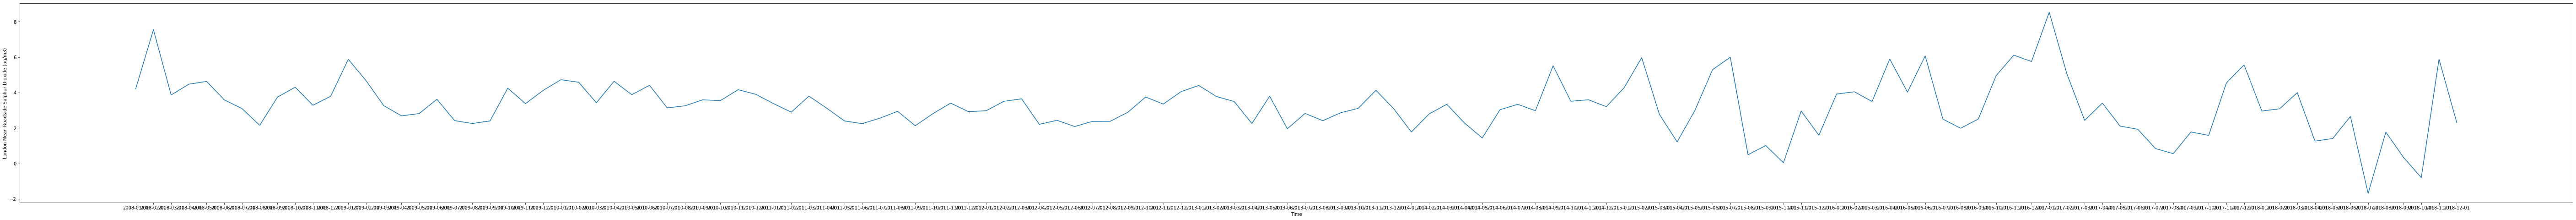

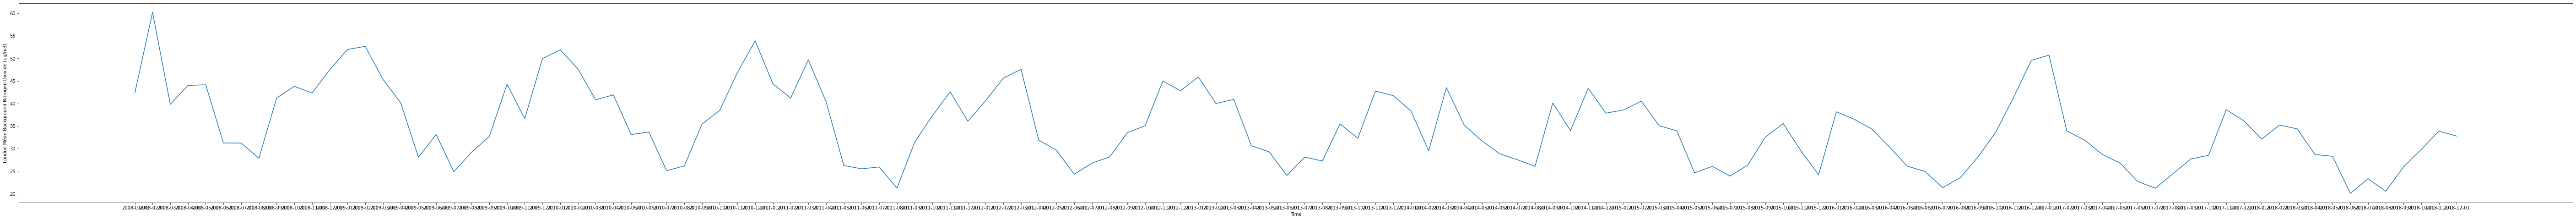

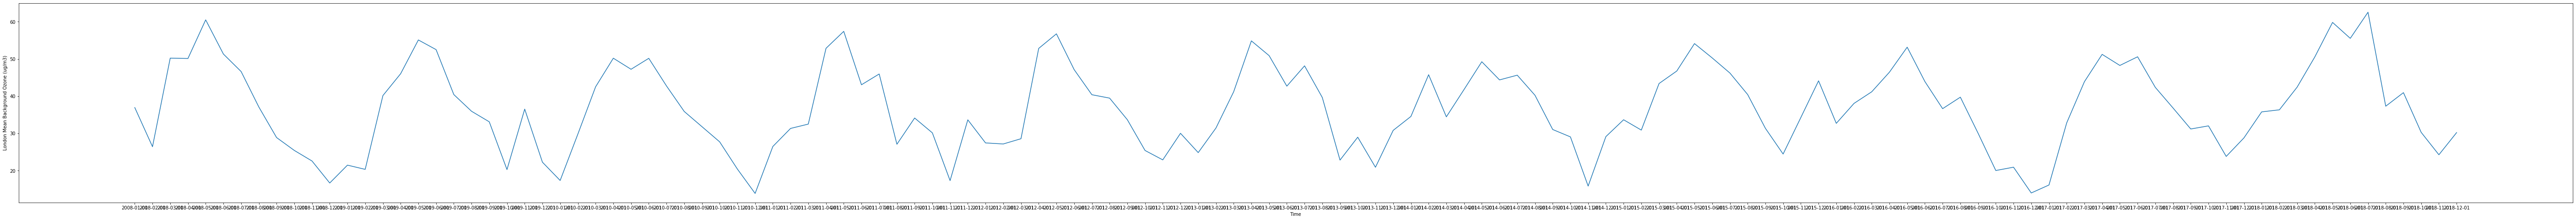

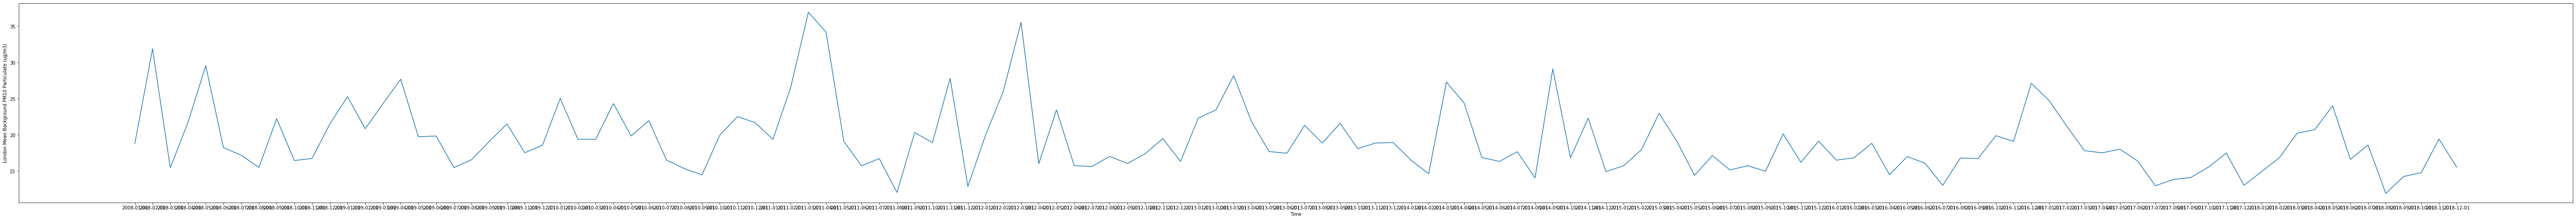

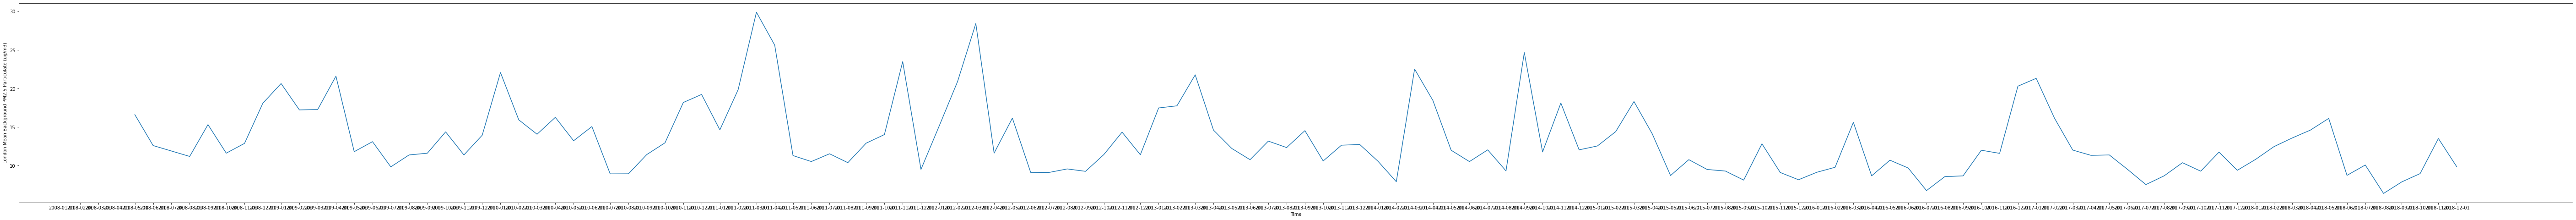

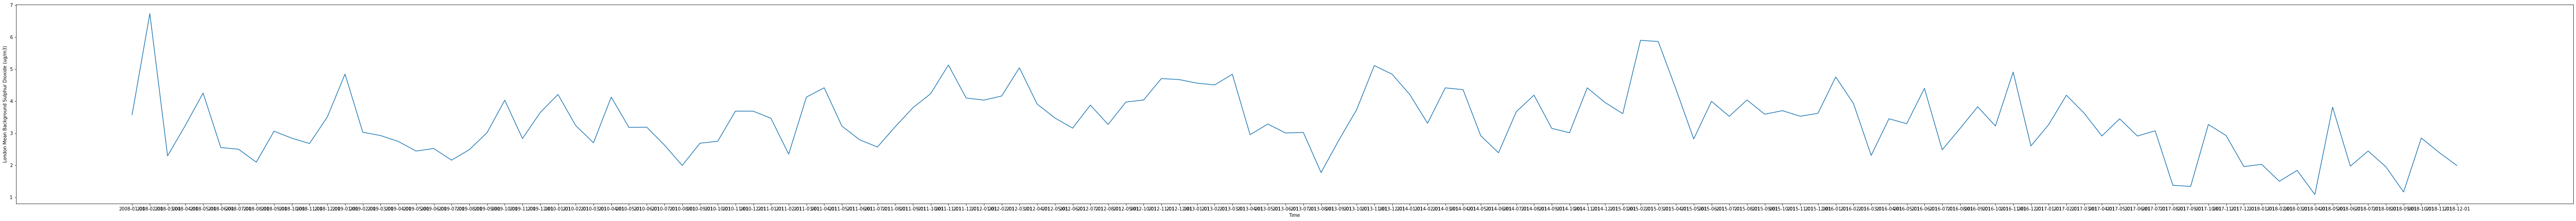

In [12]:
def plot_data(col):
    plt.figure(figsize=(100, 8))
    plt.plot(daily_data[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
for col in daily_data.columns:
    plot_data(col)

In [0]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

Nitric Oxide Prediction

In [22]:
df = daily_data.reset_index()
df.columns = ['ds', 'y', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8' , 'y9']
df.head()

,ds,y,y1,y2,y3,y4,y5,y6,y7,y8,y9
0,2008-01-01,55.502688,29.512097,24.969086,14.678763,4.217742,42.338710,36.942204,18.817204,NaN,3.572581
1,2008-02-01,75.922414,20.317529,39.477011,28.772989,7.553161,60.237069,26.425287,31.896552,NaN,6.734195
2,2008-03-01,55.610215,40.103495,21.569892,12.299776,3.868280,39.801075,50.227151,15.477151,NaN,2.286290
3,2008-04-01,61.756944,37.884722,28.740278,20.461111,4.475000,44.009722,50.133333,21.729167,NaN,3.236111
4,2008-05-01,62.903226,46.266129,34.611559,27.508065,4.634409,44.141129,60.512097,29.545699,16.621242,4.250000


In [23]:
m = Prophet()
m.fit(df)

In [24]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
492,2019-11-27
493,2019-11-28
494,2019-11-29
495,2019-11-30
496,2019-12-01


In [25]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
492,2019-11-27,24.592621,18.780753,30.741354
493,2019-11-28,29.439410,23.202717,35.338841
494,2019-11-29,35.043060,29.293583,40.597282
495,2019-11-30,41.259138,35.571685,47.023589
496,2019-12-01,47.923607,42.288083,54.206323


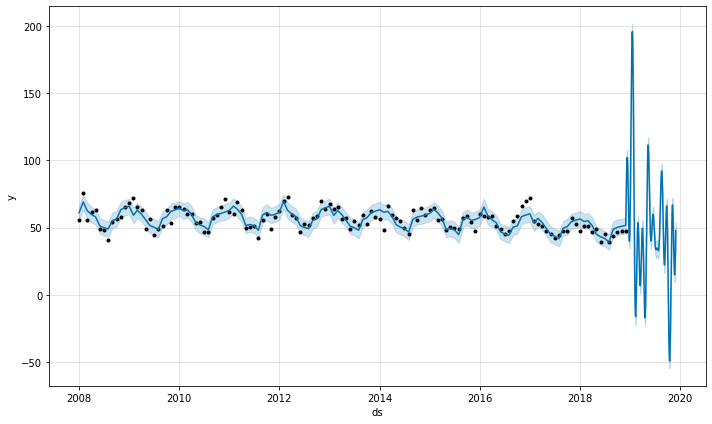

In [28]:
NOforecast = m.plot(forecast)

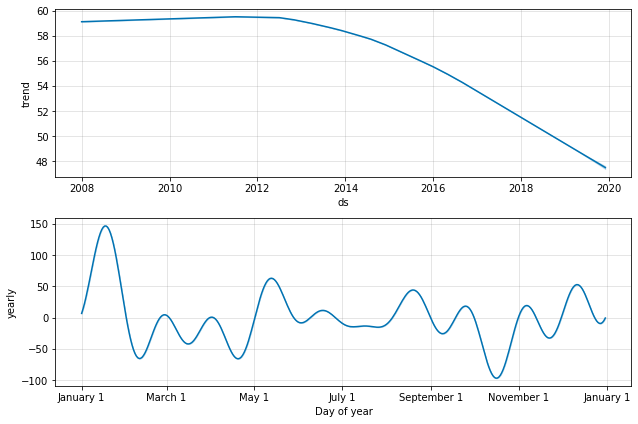

In [29]:
NOcomponents = m.plot_components(forecast)


Nitrogen Dioxide Prediction

In [30]:
df = daily_data.reset_index()
df.columns = ['ds', 'y1', 'y', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8' , 'y9']
df.head()

,ds,y1,y,y2,y3,y4,y5,y6,y7,y8,y9
0,2008-01-01,55.502688,29.512097,24.969086,14.678763,4.217742,42.338710,36.942204,18.817204,NaN,3.572581
1,2008-02-01,75.922414,20.317529,39.477011,28.772989,7.553161,60.237069,26.425287,31.896552,NaN,6.734195
2,2008-03-01,55.610215,40.103495,21.569892,12.299776,3.868280,39.801075,50.227151,15.477151,NaN,2.286290
3,2008-04-01,61.756944,37.884722,28.740278,20.461111,4.475000,44.009722,50.133333,21.729167,NaN,3.236111
4,2008-05-01,62.903226,46.266129,34.611559,27.508065,4.634409,44.141129,60.512097,29.545699,16.621242,4.250000


In [31]:
m = Prophet()
m.fit(df)


In [32]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
492,2019-11-27
493,2019-11-28
494,2019-11-29
495,2019-11-30
496,2019-12-01


In [33]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
492,2019-11-27,38.546416,32.962462,44.100251
493,2019-11-28,34.344955,29.115669,39.342653
494,2019-11-29,30.180918,24.927793,35.570536
495,2019-11-30,26.144486,21.016719,31.536166
496,2019-12-01,22.321825,17.366699,28.000911


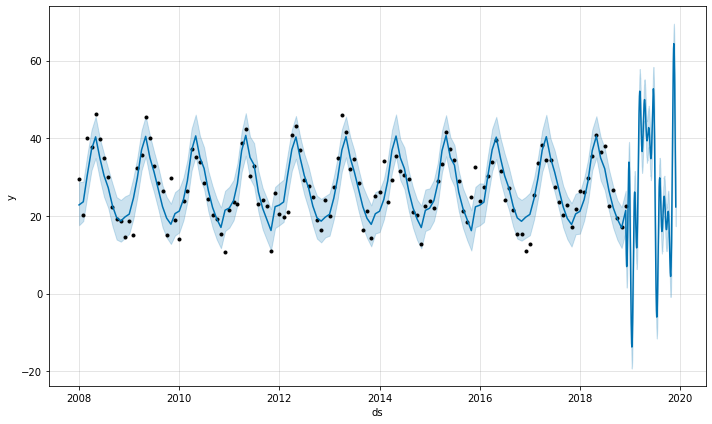

In [34]:
NO2forecast = m.plot(forecast)

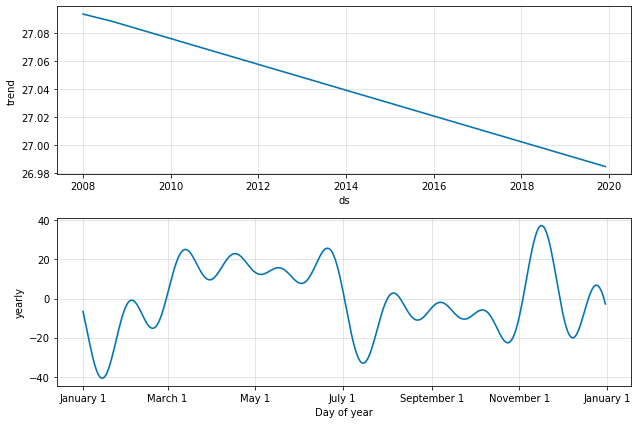

In [35]:
NO2components = m.plot_components(forecast)

PM10 Forecast

In [36]:
df = daily_data.reset_index()
df.columns = ['ds', 'y1', 'y2', 'y', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8' , 'y9']
df.head()

,ds,y1,y2,y,y3,y4,y5,y6,y7,y8,y9
0,2008-01-01,55.502688,29.512097,24.969086,14.678763,4.217742,42.338710,36.942204,18.817204,NaN,3.572581
1,2008-02-01,75.922414,20.317529,39.477011,28.772989,7.553161,60.237069,26.425287,31.896552,NaN,6.734195
2,2008-03-01,55.610215,40.103495,21.569892,12.299776,3.868280,39.801075,50.227151,15.477151,NaN,2.286290
3,2008-04-01,61.756944,37.884722,28.740278,20.461111,4.475000,44.009722,50.133333,21.729167,NaN,3.236111
4,2008-05-01,62.903226,46.266129,34.611559,27.508065,4.634409,44.141129,60.512097,29.545699,16.621242,4.250000


In [37]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
492,2019-11-27
493,2019-11-28
494,2019-11-29
495,2019-11-30
496,2019-12-01


In [0]:
forecast = m.predict(future)

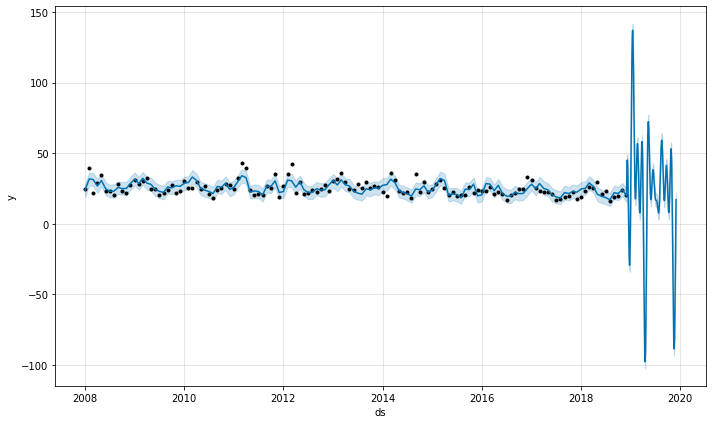

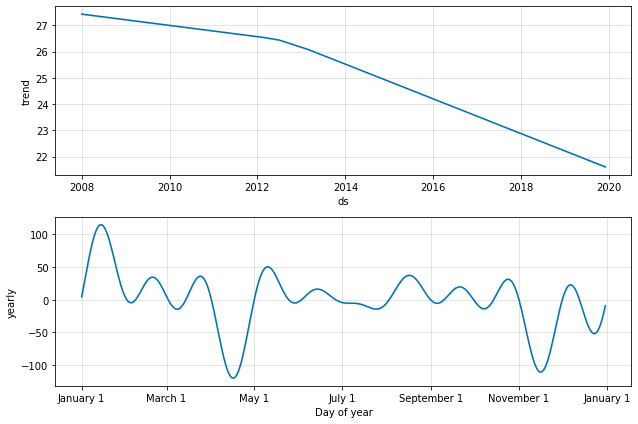

In [39]:
PM10forecast = m.plot(forecast)
PM10components = m.plot_components(forecast)

PM2.5 Prediction

In [40]:
df = daily_data.reset_index()
df.columns = ['ds', 'y1', 'y2', 'y3', 'y', 'y4', 'y5', 'y6', 'y7', 'y8' , 'y9']
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
492,2019-11-27
493,2019-11-28
494,2019-11-29
495,2019-11-30
496,2019-12-01


In [0]:
forecast = m.predict(future)

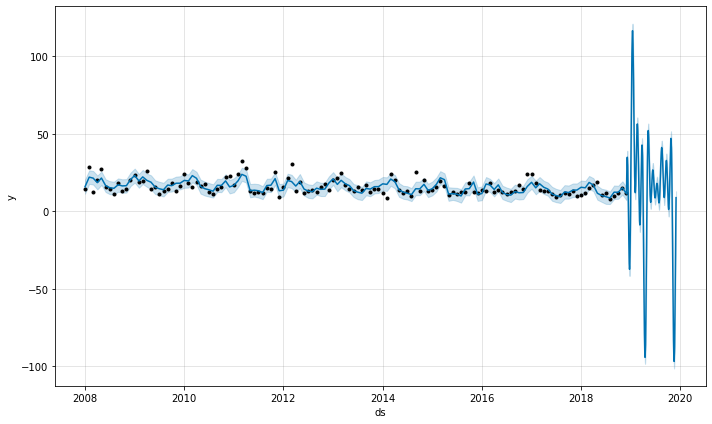

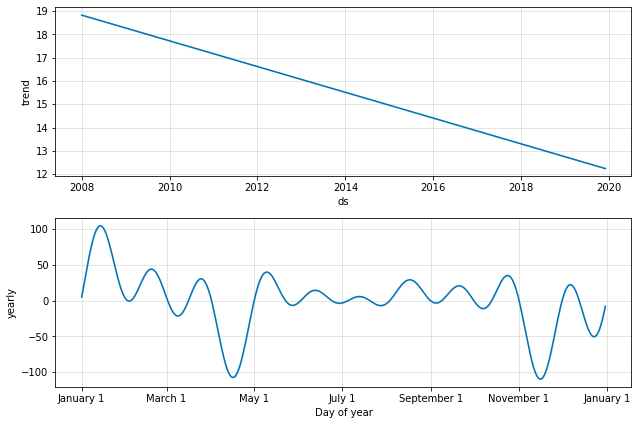

In [42]:
PM25forecast = m.plot(forecast)
PM25components = m.plot_components(forecast)